In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv('Tamilnadu agriculture yield data.csv')
data.head(10)


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Tamil Nadu,ARIYALUR,2008,Kharif,Rice,24574,NaN
1,Tamil Nadu,ARIYALUR,2008,Whole Year,Arhar/Tur,209,NaN
2,Tamil Nadu,ARIYALUR,2008,Whole Year,Bajra,565,NaN
3,Tamil Nadu,ARIYALUR,2008,Whole Year,Banana,190,NaN
4,Tamil Nadu,ARIYALUR,2008,Whole Year,Cashewnut,31113,NaN
5,Tamil Nadu,ARIYALUR,2008,Whole Year,Castor seed,27,NaN
6,Tamil Nadu,ARIYALUR,2008,Whole Year,Coconut,335,NaN
7,Tamil Nadu,ARIYALUR,2008,Whole Year,Coriander,460,NaN
8,Tamil Nadu,ARIYALUR,2008,Whole Year,Cotton(lint),3566,NaN
9,Tamil Nadu,ARIYALUR,2008,Whole Year,Dry chillies,1774,NaN


In [3]:
data.tail()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
13542,Tamil Nadu,VIRUDHUNAGAR,2013,Whole Year,Small millets,1187,676.0
13543,Tamil Nadu,VIRUDHUNAGAR,2013,Whole Year,Sugarcane,2917,296017.0
13544,Tamil Nadu,VIRUDHUNAGAR,2013,Whole Year,Sweet potato,4,84.0
13545,Tamil Nadu,VIRUDHUNAGAR,2013,Whole Year,Tapioca,4,120.0
13546,Tamil Nadu,VIRUDHUNAGAR,2013,Whole Year,Turmeric,4,15.0


In [4]:
print('The shape of the data is {}'.format(data.shape))
print('The size of the data is {}'.format(data.size))



The shape of the data is (13547, 7)
The size of the data is 94829


In [5]:
data.info

<bound method DataFrame.info of        State_Name District_Name  Crop_Year      Season           Crop   Area  \
0      Tamil Nadu      ARIYALUR       2008      Kharif           Rice  24574   
1      Tamil Nadu      ARIYALUR       2008  Whole Year      Arhar/Tur    209   
2      Tamil Nadu      ARIYALUR       2008  Whole Year          Bajra    565   
3      Tamil Nadu      ARIYALUR       2008  Whole Year         Banana    190   
4      Tamil Nadu      ARIYALUR       2008  Whole Year      Cashewnut  31113   
...           ...           ...        ...         ...            ...    ...   
13542  Tamil Nadu  VIRUDHUNAGAR       2013  Whole Year  Small millets   1187   
13543  Tamil Nadu  VIRUDHUNAGAR       2013  Whole Year      Sugarcane   2917   
13544  Tamil Nadu  VIRUDHUNAGAR       2013  Whole Year   Sweet potato      4   
13545  Tamil Nadu  VIRUDHUNAGAR       2013  Whole Year        Tapioca      4   
13546  Tamil Nadu  VIRUDHUNAGAR       2013  Whole Year       Turmeric      4   

       

In [6]:
data.describe()

,Crop_Year,Area,Production
count,13547.000000,13547.000000,1.326600e+04
mean,2004.877537,7078.900642,9.103304e+05
std,4.714027,20874.776934,2.108750e+07
min,1997.000000,1.000000,0.000000e+00
25%,2002.000000,48.500000,5.700000e+01
50%,2004.000000,624.000000,8.410000e+02
75%,2009.000000,4472.500000,9.067250e+03
max,2013.000000,367554.000000,1.250800e+09


In [7]:
print('Total Variety of crops {}'.format(data['Crop'].nunique()))
print('Total number of seasons {}'.format(data['Season'].nunique()))
print('Total number of cities {}'.format(data['District_Name'].nunique()))

Total Variety of crops 87
Total number of seasons 3
Total number of cities 31


C:\Users\Vivek\anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


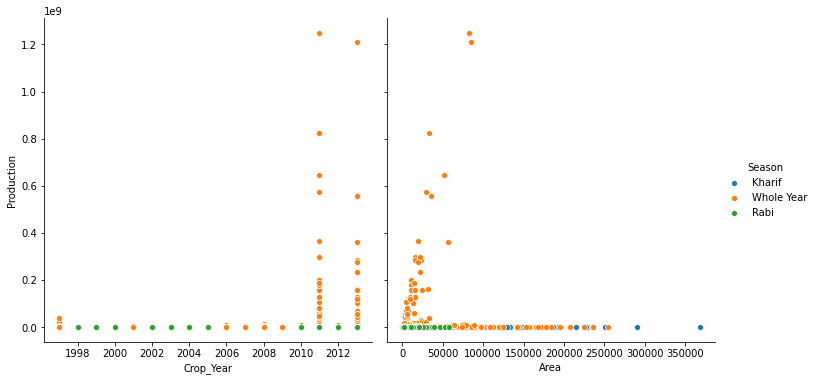

In [8]:
sns.pairplot(x_vars =['Crop_Year', 'Area'],y_vars='Production', data = data, hue = 'Season', size = 5)

In [9]:
dist = data.groupby('District_Name').mean()
print(dist)

                   Crop_Year          Area    Production
District_Name                                           
ARIYALUR         2010.638462   4156.046154  9.063429e+04
COIMBATORE       2004.684502   7141.184502  4.712674e+06
CUDDALORE        2004.765086  11236.898707  3.522117e+05
DHARMAPURI       2004.587477   9564.119705  4.203325e+05
DINDIGUL         2004.615000   5777.755000  1.289705e+06
ERODE            2004.537653   6576.732049  7.401406e+05
KANCHIPURAM      2004.740741   7725.301235  2.326733e+05
KANNIYAKUMARI    2004.507874   3866.543307  1.822348e+06
KARUR            2004.798701   3652.956710  2.356772e+05
KRISHNAGIRI      2007.463343   4235.982405  1.797549e+06
MADURAI          2004.737374   4783.911111  7.626019e+05
NAGAPATTINAM     2004.267913  14625.638629  3.814060e+05
NAMAKKAL         2004.775047   5783.491493  4.712335e+05
PERAMBALUR       2004.804167   6437.141667  9.936147e+04
PUDUKKOTTAI      2004.610599   6432.052995  6.538007e+05
RAMANATHAPURAM   2004.962865   

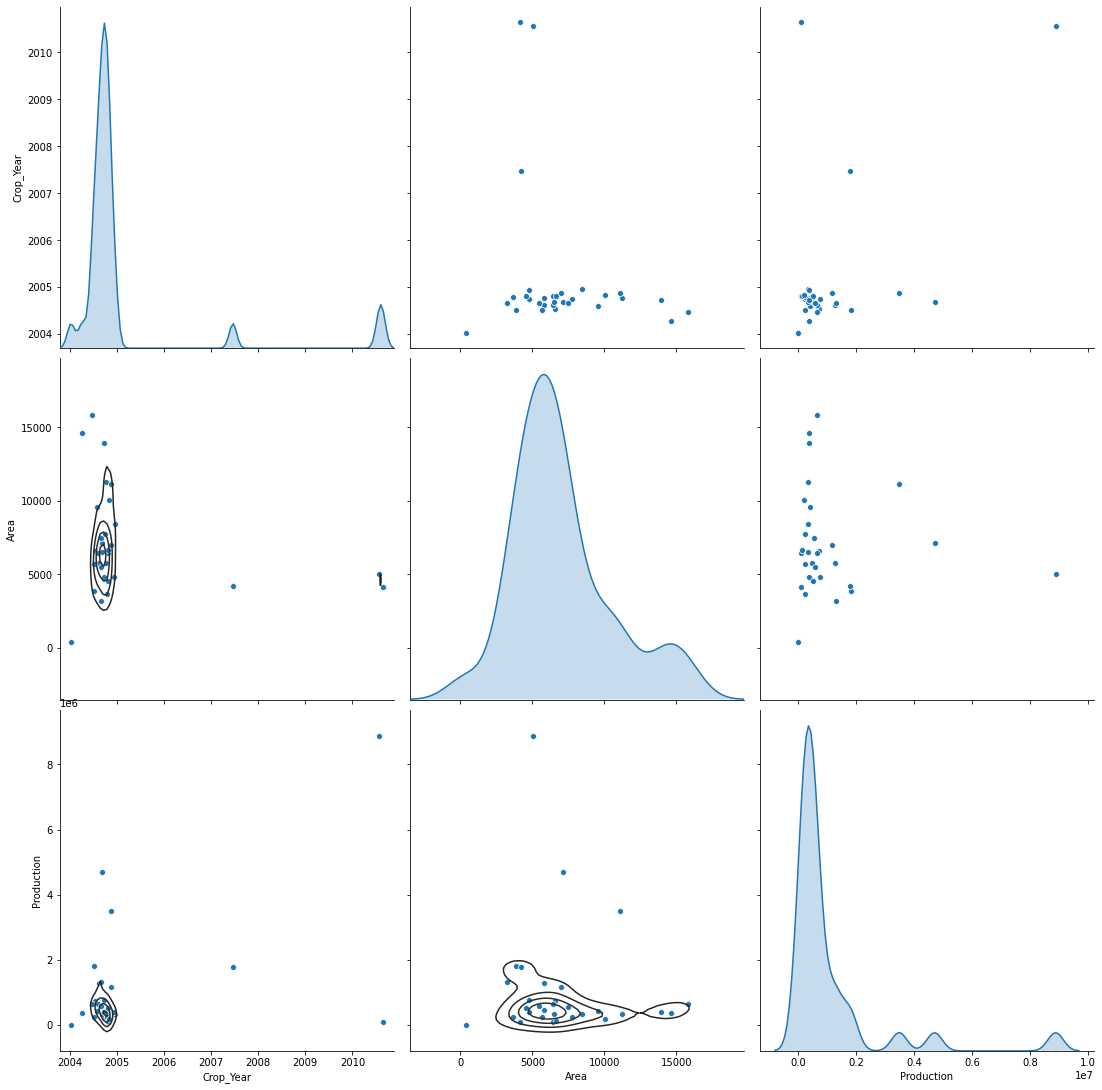

In [10]:
par = sns.pairplot(dist, diag_kind = "kde", kind = 'scatter', height = 5)
par.map_lower(sns.kdeplot, levels=4, color=".2")

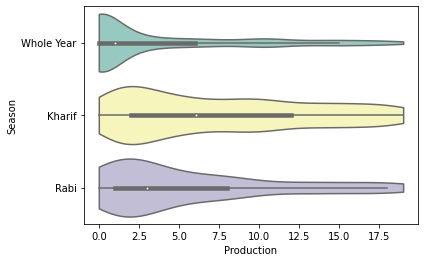

In [11]:
sns.violinplot( x= 'Production', y="Season", data=data[data.Production < 20] ,cut=0, scale="width", palette="Set3", height = 5)

In [12]:
dist.isnull()

,Crop_Year,Area,Production
District_Name,,,
ARIYALUR,False,False,False
COIMBATORE,False,False,False
CUDDALORE,False,False,False
DHARMAPURI,False,False,False
DINDIGUL,False,False,False
ERODE,False,False,False
KANCHIPURAM,False,False,False
KANNIYAKUMARI,False,False,False
KARUR,False,False,False


In [13]:
dist.isnull().sum()

Crop_Year     0
Area          0
Production    0
dtype: int64

In [14]:
data.isnull().sum()

State_Name         0
District_Name      0
Crop_Year          0
Season             0
Crop               0
Area               0
Production       281
dtype: int64

In [15]:
mn = data.mean()
print(mn)


Crop_Year       2004.877537
Area            7078.900642
Production    910330.397175
dtype: float64


In [16]:
data = data.fillna(mn)

In [17]:
data.head(10)

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Tamil Nadu,ARIYALUR,2008,Kharif,Rice,24574,910330.397175
1,Tamil Nadu,ARIYALUR,2008,Whole Year,Arhar/Tur,209,910330.397175
2,Tamil Nadu,ARIYALUR,2008,Whole Year,Bajra,565,910330.397175
3,Tamil Nadu,ARIYALUR,2008,Whole Year,Banana,190,910330.397175
4,Tamil Nadu,ARIYALUR,2008,Whole Year,Cashewnut,31113,910330.397175
5,Tamil Nadu,ARIYALUR,2008,Whole Year,Castor seed,27,910330.397175
6,Tamil Nadu,ARIYALUR,2008,Whole Year,Coconut,335,910330.397175
7,Tamil Nadu,ARIYALUR,2008,Whole Year,Coriander,460,910330.397175
8,Tamil Nadu,ARIYALUR,2008,Whole Year,Cotton(lint),3566,910330.397175
9,Tamil Nadu,ARIYALUR,2008,Whole Year,Dry chillies,1774,910330.397175


In [18]:
data.isnull().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

In [19]:
dist.mean()

Crop_Year     2.005148e+03
Area          7.031450e+03
Production    1.073554e+06
dtype: float64

In [20]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
data['District_Name'] = label.fit_transform(data['District_Name'])
data['Season'] = label.fit_transform(data['Season'])
data['Crop'] = label.fit_transform(data['Crop'])

In [21]:
data.tail(6)

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
13541,Tamil Nadu,30,2013,2,29,18,12.0
13542,Tamil Nadu,30,2013,2,70,1187,676.0
13543,Tamil Nadu,30,2013,2,73,2917,296017.0
13544,Tamil Nadu,30,2013,2,75,4,84.0
13545,Tamil Nadu,30,2013,2,76,4,120.0
13546,Tamil Nadu,30,2013,2,80,4,15.0


In [22]:
data.tail()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
13542,Tamil Nadu,30,2013,2,70,1187,676.0
13543,Tamil Nadu,30,2013,2,73,2917,296017.0
13544,Tamil Nadu,30,2013,2,75,4,84.0
13545,Tamil Nadu,30,2013,2,76,4,120.0
13546,Tamil Nadu,30,2013,2,80,4,15.0


In [23]:
data = data.drop(columns = ['State_Name'], axis = 1)

In [24]:
data.head()

,District_Name,Crop_Year,Season,Crop,Area,Production
0,0,2008,0,66,24574,910330.397175
1,0,2008,2,2,209,910330.397175
2,0,2008,2,4,565,910330.397175
3,0,2008,2,5,190,910330.397175
4,0,2008,2,17,31113,910330.397175


In [25]:
data.tail()

,District_Name,Crop_Year,Season,Crop,Area,Production
13542,30,2013,2,70,1187,676.0
13543,30,2013,2,73,2917,296017.0
13544,30,2013,2,75,4,84.0
13545,30,2013,2,76,4,120.0
13546,30,2013,2,80,4,15.0


In [26]:
data = data.drop(columns = ['Crop_Year'], axis = 1)


In [109]:
from sklearn.model_selection import train_test_split

X = data[['Season', 'Crop','Area','Production']]
y = data['District_Name']

X_train, X_test, Y_train, Y_test = train_test_split(X, y , random_state = 45, test_size = 0.2)

In [110]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(10837, 4)
(2710, 4)
(10837,)
(2710,)


In [111]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

sd = StandardScaler()
norm = MinMaxScaler()
X_train_norm = norm.fit_transform(X_train)
X_test_norm = norm.fit_transform(X_test)

X_train_sd = sd.fit_transform(X_train)
X_test_sd = sd.fit_transform(X_test)

In [77]:
from sklearn.tree import DecisionTreeRegressor


dtr = DecisionTreeRegressor(criterion = 'mse', max_depth = 2, max_leaf_nodes = 2, random_state = 12)
dtr.fit(X_train_norm, Y_train)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=2,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=12, splitter='best')

In [78]:
list(zip(X_train_norm,dtr.feature_importances_))

[(array([0.8       , 1.        , 0.59302326, 0.00114269]), 0.0),
 (array([0.56666667, 0.        , 0.26744186, 0.00317777]), 0.0),
 (array([0.96666667, 1.        , 0.88372093, 0.01167995]), 0.0),
 (array([8.33333333e-01, 1.00000000e+00, 7.20930233e-01, 5.44139213e-06]),
  1.0)]

In [79]:
dtr.cost_complexity_pruning_path(X, y, sample_weight=None)

{'ccp_alphas': array([0.00000000e+00, 3.29954402e+12]),
 'impurities': array([4.32126268e+14, 4.35425812e+14])}

In [80]:
dtr.get_depth()

1

In [81]:
dtr.get_n_leaves()



2

In [85]:
y_pred = dtr.predict(X_test_norm)
from sklearn import metrics
print('The mse is {}'.format(np.sqrt(metrics.mean_squared_error(Y_test,y_pred))))
dtr.score(X_test_norm, Y_test)

The mse is 21179784.674758356


0.00578315521586914

In [67]:
dtr1 = DecisionTreeRegressor(criterion = 'mse', max_depth = 1, max_leaf_nodes = 2, random_state = 12)
dtr1.fit(X_train_sd,Y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=1,
                      max_features=None, max_leaf_nodes=2,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=12, splitter='best')

In [68]:
list(zip(X_train_sd,dtr1.feature_importances_))

[(array([ 0.99132548,  0.78775172,  0.31610961, -0.31662691]), 0.0),
 (array([ 0.21345158, -1.34167342, -0.7738175 , -0.28105825]), 0.0),
 (array([ 1.54694969,  0.78775172,  1.28925881, -0.13245923]), 0.0),
 (array([ 1.10245032,  0.78775172,  0.74429525, -0.33650351]), 1.0)]

In [69]:
y_pred1=dtr1.predict(X_test_sd)

In [100]:
print(dtr1.score(X_test_sd,Y_test))
print('The rmse is {}'.format(np.sqrt(metrics.mean_squared_error(Y_test,y_pred1))))

0.007217293893875265
The rmse is 21164503.44601619


In [101]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
lin.fit(X_train_sd,Y_train)
y_pred2=lin.predict(X_test_sd)

In [102]:
print('The rmse is {}'.format(np.sqrt(metrics.mean_squared_error(Y_test,y_pred2))))

The rmse is 21189550.618550036


In [99]:
print('The mae is {}'.format(metrics.mean_absolute_error(Y_test,y_pred2)))

The mae is 2179148.5906544668


In [112]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth = 2, criterion = 'gini', random_state = 12)
dt.fit(X_train_sd, Y_train)
y_pred3 = dt.predict(X_test_sd)

In [113]:
dt.decision_path(X_train_sd)

<10837x7 sparse matrix of type '<class 'numpy.int64'>'
	with 32511 stored elements in Compressed Sparse Row format>

[Text(167.4, 181.2, 'X[2] <= -0.331\ngini = 0.965\nsamples = 10837\nvalue = [107, 424, 380, 441, 478, 457, 324, 210, 355, 271\n407, 267, 416, 391, 337, 303, 459, 347, 343, 249\n400, 318, 242, 399, 426, 106, 408, 363, 405, 399\n405]'),
 Text(83.7, 108.72, 'X[0] <= -0.809\ngini = 0.965\nsamples = 3533\nvalue = [31, 93, 113, 87, 102, 127, 167, 112, 124, 88, 121\n116, 97, 115, 153, 98, 114, 167, 180, 154, 126\n134, 115, 90, 136, 19, 121, 111, 131, 79, 112]'),
 Text(41.85, 36.23999999999998, '\n  (...)  \n'),
 Text(125.55000000000001, 36.23999999999998, '\n  (...)  \n'),
 Text(251.10000000000002, 108.72, 'X[2] <= 4.495\ngini = 0.963\nsamples = 7304\nvalue = [76, 331, 267, 354, 376, 330, 157, 98, 231, 183\n286, 151, 319, 276, 184, 205, 345, 180, 163, 95\n274, 184, 127, 309, 290, 87, 287, 252, 274, 320\n293]'),
 Text(209.25, 36.23999999999998, '\n  (...)  \n'),
 Text(292.95, 36.23999999999998, '\n  (...)  \n')]

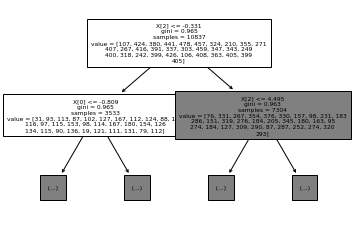

In [130]:
from sklearn import tree
tree.plot_tree(dt,max_depth = 1, fontsize = 6)


In [133]:
dt.score(X,y)

0.03351295489776334

In [139]:
metrics.accuracy_score(Y_test,y_pred3)

0.045756457564575644